In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_series( time, series, format="-", start=0, end=None):
	plt.figure( figsize=( 10, 6))

	if type( series) is tuple:
		for series_num in series:
			plt.plot( time[ start:end], series_num[ start: end], format)
	else:
		plt.plot( time[ start:end], series[ start:end], format)

	plt.xlabel( "Time")

	plt.ylabel( "Value")

	plt.grid( True)

	plt.show()

In [4]:
def trend( time, slope=0):
	series = slope * time
	return series

def seasonal_pattern( season_time):
	return np.where(
		season_time < 0.4,
		np.cos( season_time * 2 * np.pi),
		1 / np.exp( 3 * season_time)
	)

def seasonality( time, period, amplitude=1, phase=0):
	season_time = ( ( time + phase) % period) / period
	return amplitude * seasonal_pattern( season_time)

def noise( time, noise_level=1, seed=None):
	rnd = np.random.RandomState( seed)
	return rnd.randn( len( time)) * noise_level

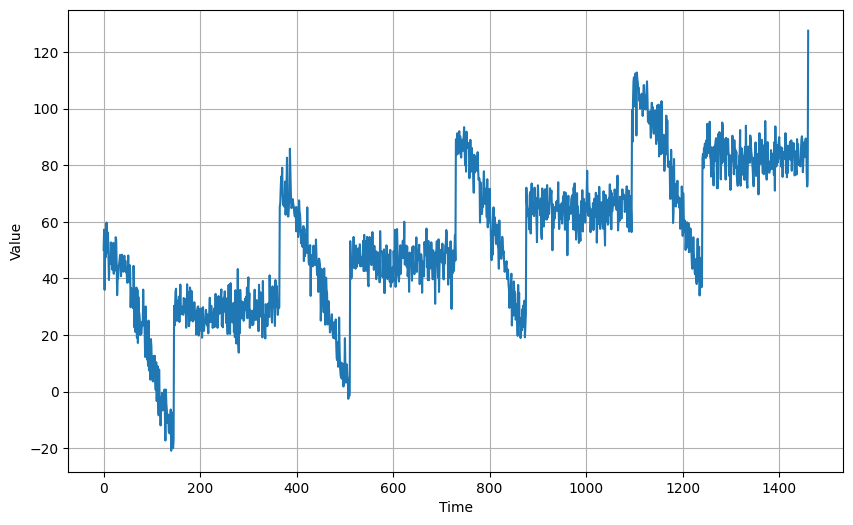

In [7]:
time = np.arange( 4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

series = baseline + trend( time, slope) + seasonality( time, period=365, amplitude=amplitude)

series += noise( time, noise_level)

plot_series( time, series)

In [8]:
split_time = 1000

time_train = time[ :split_time]
x_train = series[ :split_time]

time_valid = time[ split_time:]
x_valid = series[ split_time:]

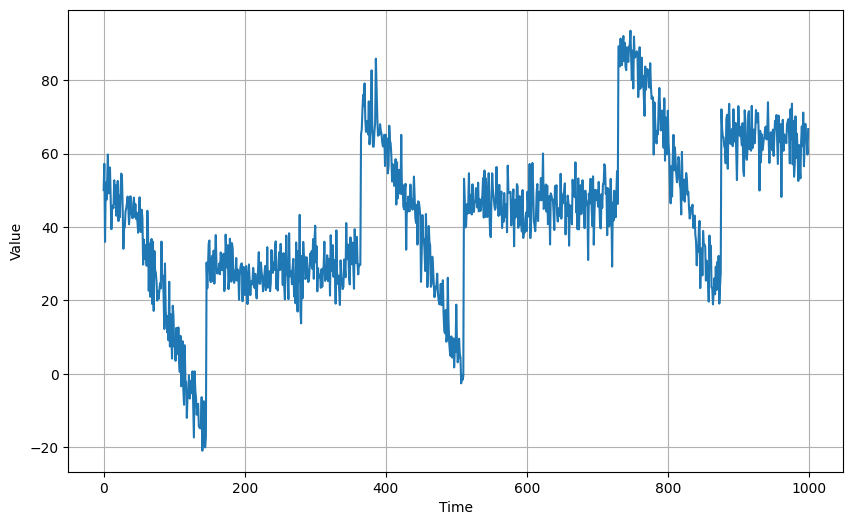

In [9]:
plot_series( time_train, x_train)

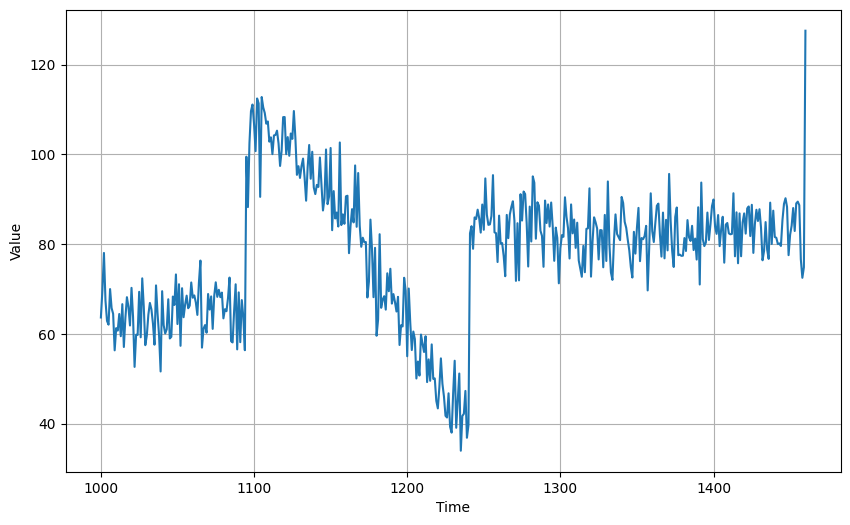

In [10]:
plot_series( time_valid, x_valid)

In [11]:
naive_forecast = series[ split_time - 1:-1]

time_step = 100

print( f"Ground truth at time step: { time_step}: { x_valid[ time_step]}")
print( f"Prediction at time step: { time_step + 1}: { naive_forecast[ time_step + 1]}")

Ground truth at time step: 100: 106.75814819335938
Prediction at time step: 101: 106.75814819335938


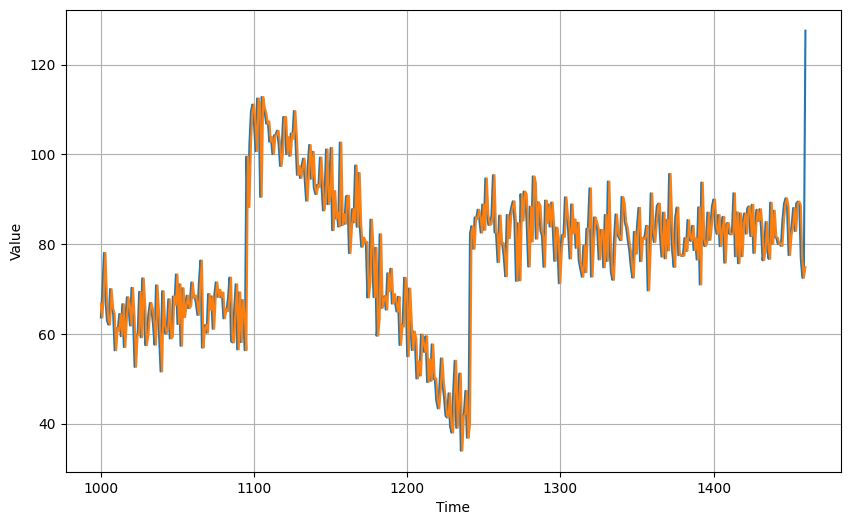

In [12]:
plot_series( time_valid, ( x_valid, naive_forecast))

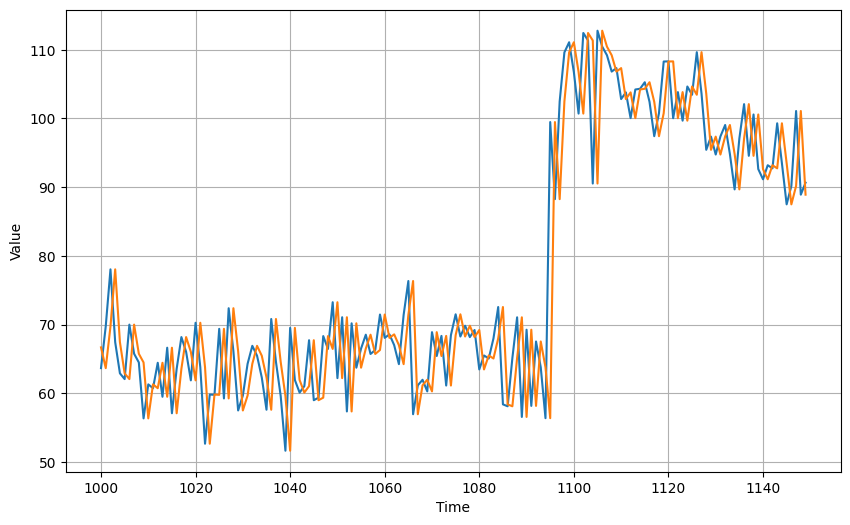

In [13]:
plot_series( time_valid, ( x_valid, naive_forecast), start=0, end=150)

In [14]:
print( tf.keras.metrics.mean_squared_error( x_valid, naive_forecast).numpy())
print( tf.keras.metrics.mean_absolute_error( x_valid, naive_forecast).numpy())

69.78548
6.2191877


In [15]:
def moving_average_forecast( series, window_size):
	forecast = []

	for time in range( len( series) - window_size):
		forecast.append( series[ time:time + window_size].mean())

	return np.array( forecast)

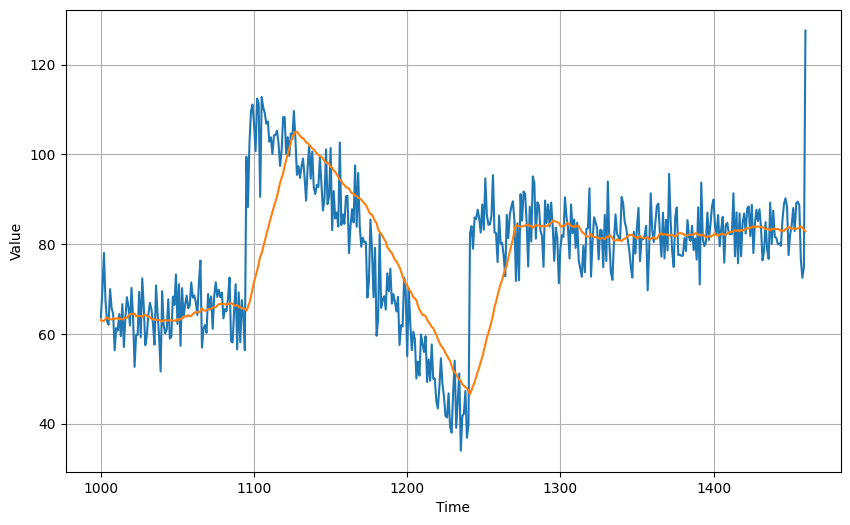

In [16]:
moving_avg = moving_average_forecast( series, 30)[ split_time - 30:]

plot_series( time_valid, ( x_valid, moving_avg))

In [17]:
print( tf.keras.metrics.mean_squared_error( x_valid, moving_avg).numpy())
print( tf.keras.metrics.mean_absolute_error( x_valid, moving_avg).numpy())

122.55417
7.6421027


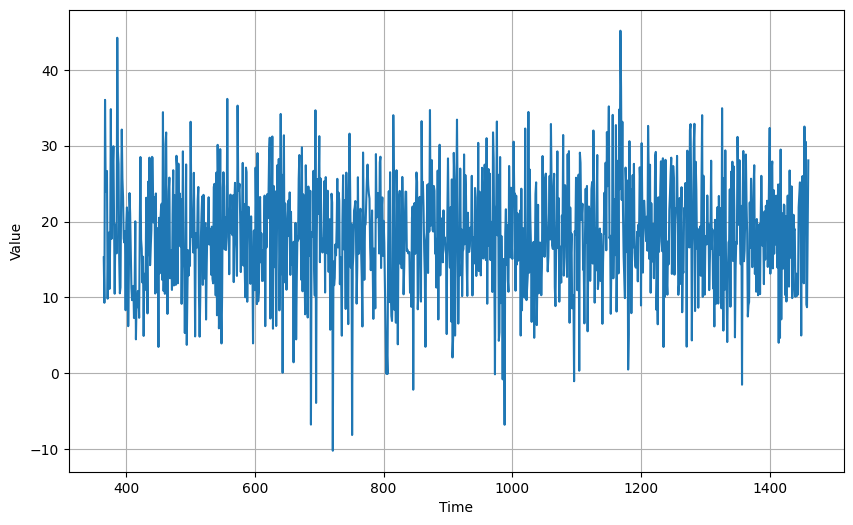

In [19]:
diff_series = ( series[ 365:] - series[ :-365])

diff_time = time[ 365:]

plot_series( diff_time, diff_series)

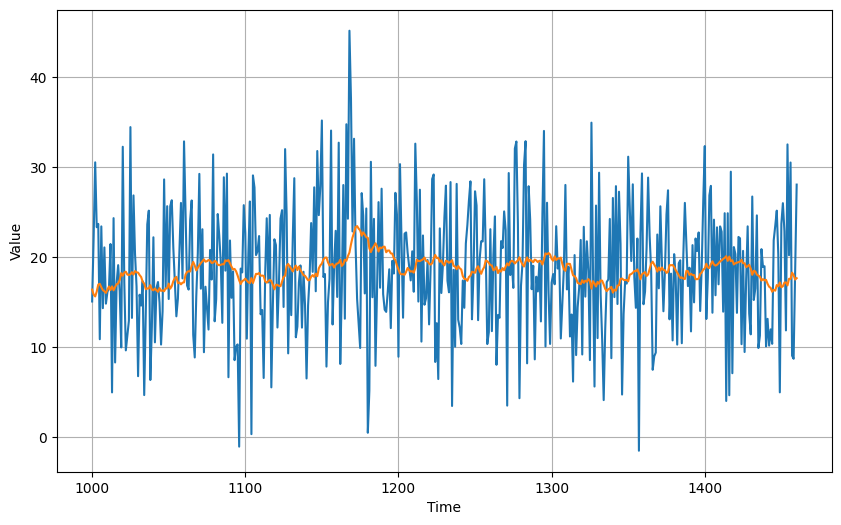

In [21]:
diff_moving_avg = moving_average_forecast( diff_series, 30)

diff_moving_avg = diff_moving_avg[ split_time - 365 - 30:]

diff_series = diff_series[ split_time - 365:]

plot_series( time_valid, ( diff_series, diff_moving_avg))

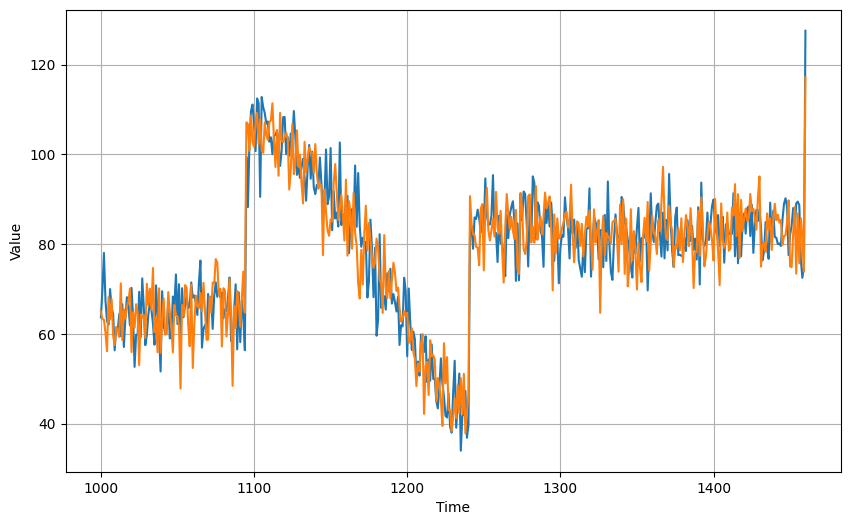

In [22]:
diff_moving_avg_plus_past = series[ split_time - 365:-365] + diff_moving_avg

plot_series( time_valid, ( x_valid, diff_moving_avg_plus_past))

In [23]:
print( tf.keras.metrics.mean_squared_error( x_valid, diff_moving_avg_plus_past).numpy())
print( tf.keras.metrics.mean_absolute_error( x_valid, diff_moving_avg_plus_past).numpy())

54.499126
5.957031


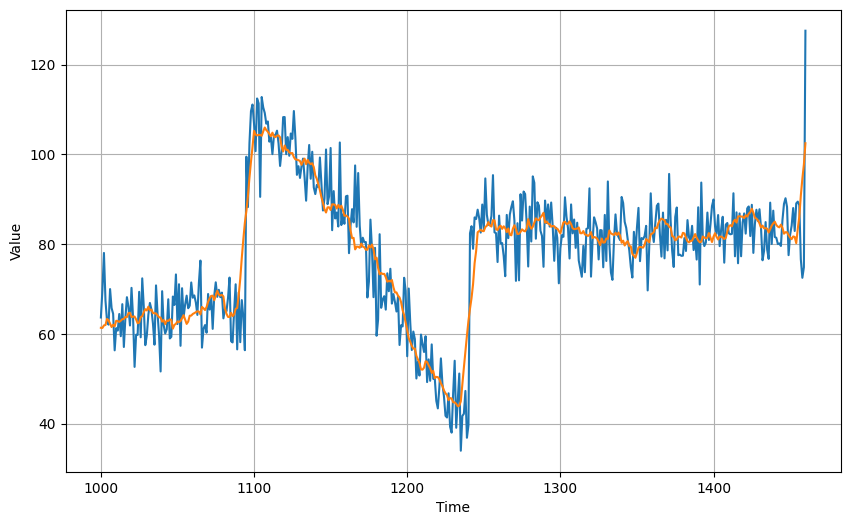

In [24]:
diff_moving_avg_plus_smooth_past = moving_average_forecast( series[ split_time - 370:-359], 11) + diff_moving_avg

plot_series( time_valid, ( x_valid, diff_moving_avg_plus_smooth_past))

In [25]:
print( tf.keras.metrics.mean_squared_error( x_valid, diff_moving_avg_plus_smooth_past).numpy())
print( tf.keras.metrics.mean_absolute_error( x_valid, diff_moving_avg_plus_smooth_past).numpy())

41.992794
4.911239
